In [1]:
import pandas as pd

In [17]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [28]:
from matplotlib.colors import Normalize
import matplotlib.patches as patches

In [70]:
import seaborn as sns

In [56]:
root_path = 'Output/Income_status/'
#file_name = 'urban_expansion_income_200_ticks_2_jupyter.asc'
file_name = 'urban_expansion_income_all_income_equal_jupyter.asc'
file_path = root_path + file_name



In [67]:
#utility_path = 'Output/utility_data-200_ticks_2.csv'
utility_path = 'Output/utility_data_all_income_equal.asc'

In [64]:
df = pd.read_csv(file_path, sep=' ', header=None)

In [68]:
ht = pd.read_csv(utility_path, sep=' ', header=None)

In [69]:
ht

,0,1,2,3,4,5,6,7,8,9,...,880,881,882,883,884,885,886,887,888,889
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
532,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
533,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
534,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [55]:
536 * 890 * 2

954080

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,880,881,882,883,884,885,886,887,888,889
0,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
532,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
533,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
534,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [8]:
unique_values_df = df.apply(pd.Series.unique)

In [9]:
unique_values_df

0      [nan]
1        [0]
2        [0]
3        [0]
4        [0]
       ...  
885      [0]
886      [0]
887    [nan]
888    [nan]
889    [nan]
Length: 890, dtype: object

In [12]:
df[550].unique()

array([0, 2, 3, 1, 4])

In [ ]:
foreach sort-on [pxcor] rows [ ?1 -> ask ?1 [
    if pcolor = yellow [file-write 1] ;; low income
    if pcolor = orange [file-write 2] ;; middle income
    if pcolor = blue [file-write 3] ;; high income
    if pcolor = green [file-write 0] ;; undeveloped lands
    if pcolor = brown [file-write 4] ] ] ;; seed year built-up

In [38]:
536/8

67.0

In [39]:
# Generate a random sample grid with dimensions 536x890
#np.random.seed(42)  # For reproducibility
#grid = np.random.choice([0, 1, 2, 3, 4, np.nan], size=(536, 890), p=[0.2, 0.2, 0.2, 0.2, 0.01, 0.19])

grid = df.values

# Define box size (you can adjust this)
box_height = 8
box_width = 10

# Prepare to store density results
density_results = []

# Iterate over the grid in box-sized steps
for i in range(0, 536, box_height):
    for j in range(0, 890, box_width):
        # Extract the sub-grid / box
        sub_grid = grid[i:i+box_height, j:j+box_width]
        
        # Calculate the number of each class in the sub-grid
        count_low_income = np.count_nonzero(sub_grid == 1)
        count_middle_income = np.count_nonzero(sub_grid == 2)
        count_high_income = np.count_nonzero(sub_grid == 3)
        
        # Calculate total cells excluding undeveloped and NaN
        total_developed = np.count_nonzero(~np.isnan(sub_grid) & (sub_grid != 0) & (sub_grid != 4))
        
        # Calculate density, guard against division by zero
        if total_developed > 0:
            density_low_income = count_low_income / total_developed
            density_middle_income = count_middle_income / total_developed
            density_high_income = count_high_income / total_developed
        else:
            density_low_income = density_middle_income = density_high_income = 0
        
        # Store the results
        density_results.append({
            'box_top_left': (i, j),
            'density_low_income': density_low_income,
            'density_middle_income': density_middle_income,
            'density_high_income': density_high_income
        })

# Optionally print some of the results to check
for result in density_results[:5]:  # Print first 5 results
    print(result)


{'box_top_left': (0, 0), 'density_low_income': 0, 'density_middle_income': 0, 'density_high_income': 0}
{'box_top_left': (0, 10), 'density_low_income': 0, 'density_middle_income': 0, 'density_high_income': 0}
{'box_top_left': (0, 20), 'density_low_income': 0, 'density_middle_income': 0, 'density_high_income': 0}
{'box_top_left': (0, 30), 'density_low_income': 0, 'density_middle_income': 0, 'density_high_income': 0}
{'box_top_left': (0, 40), 'density_low_income': 0, 'density_middle_income': 0, 'density_high_income': 0}


'urban_expansion_income_200_ticks_2_jupyter.png'

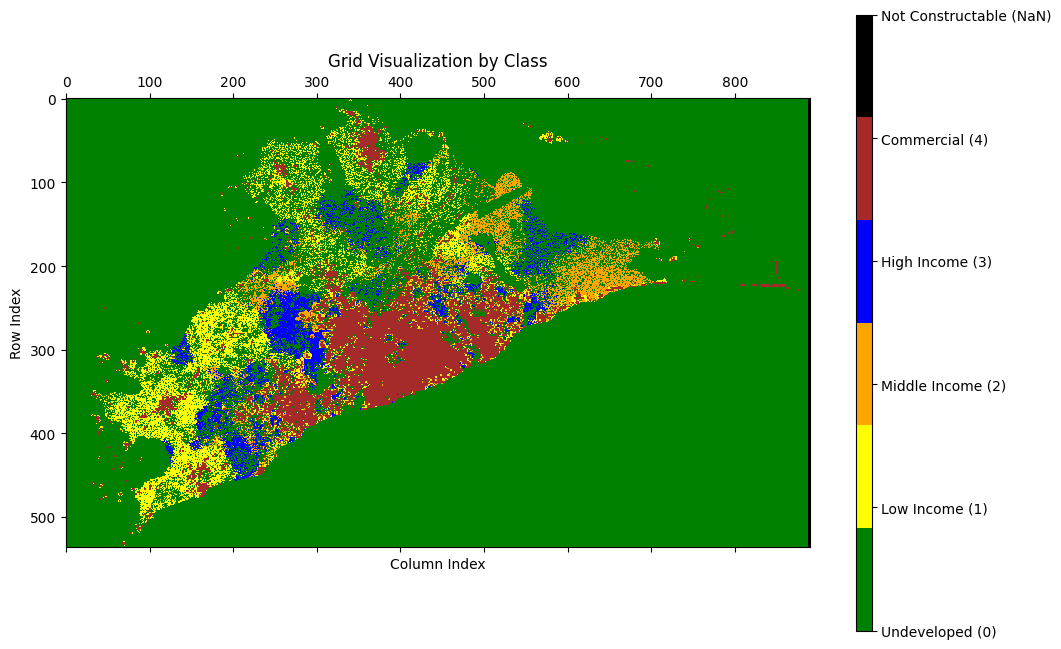

In [40]:
# Define the colors for each class and NaN
colors = ['green', 'yellow', 'orange', 'blue', 'brown', 'black']  # 0, 1, 2, 3, 4, NaN respectively
cmap = ListedColormap(colors)

# Replace NaN with a unique number (5 in this case, since it maps to 'black' in our colors list)
grid = np.nan_to_num(grid, nan=5)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size as needed
cax = ax.matshow(grid, cmap=cmap)
cbar = fig.colorbar(cax, ticks=[0, 1, 2, 3, 4, 5], aspect=40)
cbar.ax.set_yticklabels(['Undeveloped (0)', 'Low Income (1)', 'Middle Income (2)', 'High Income (3)', 'Commercial (4)', 'Not Constructable (NaN)'])

# Set title and axis labels if necessary
ax.set_title('Grid Visualization by Class')
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

img_name = file_name[:-4] + 'small_box.png'
img_path = root_path + img_name

plt.savefig(img_path)

plt.show()

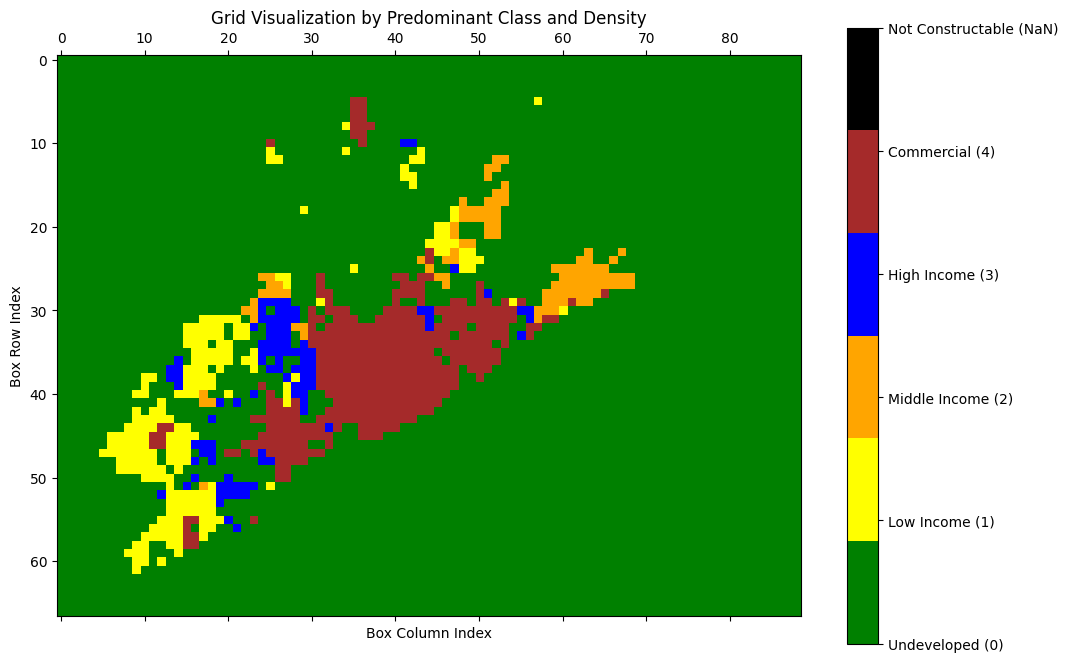

In [42]:
# Create a new grid to store the predominant class in each box
predominant_grid = np.zeros((grid.shape[0] // box_height, grid.shape[1] // box_width))
density_grid = np.zeros_like(predominant_grid)

# Iterate over the grid in box-sized steps
for i in range(0, grid.shape[0], box_height):
    for j in range(0, grid.shape[1], box_width):
        sub_grid = grid[i:i+box_height, j:j+box_width]
        unique, counts = np.unique(sub_grid, return_counts=True, axis=None)
        mask = ~np.isnan(unique)
        unique, counts = unique[mask], counts[mask]  # Remove NaNs from consideration

        if len(counts) > 0:
            max_idx = np.argmax(counts)
            predominant_class = unique[max_idx]
            total = np.sum(counts)
            density = counts[max_idx] / total

            # Store the predominant class and its density
            predominant_grid[i // box_height, j // box_width] = predominant_class
            density_grid[i // box_height, j // box_width] = density

# Define colors
colors = ['green', 'yellow', 'orange', 'blue', 'brown', 'black']  # 0, 1, 2, 3, 4, NaN respectively
cmap = ListedColormap(colors)

# Plot the predominant class grid with density reflected in color intensity
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(predominant_grid, cmap=cmap, norm=Normalize(vmin=0, vmax=5))

# Adding a color bar
cbar = fig.colorbar(cax, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['Undeveloped (0)', 'Low Income (1)', 'Middle Income (2)', 'High Income (3)', 'Commercial (4)', 'Not Constructable (NaN)'])

# Set titles and labels
ax.set_title('Grid Visualization by Predominant Class and Density')
ax.set_xlabel('Box Column Index')
ax.set_ylabel('Box Row Index')

img_name = file_name[:-4] + '_dominant_small_box.png'
img_path = root_path + img_name

plt.savefig(img_path)

plt.show()


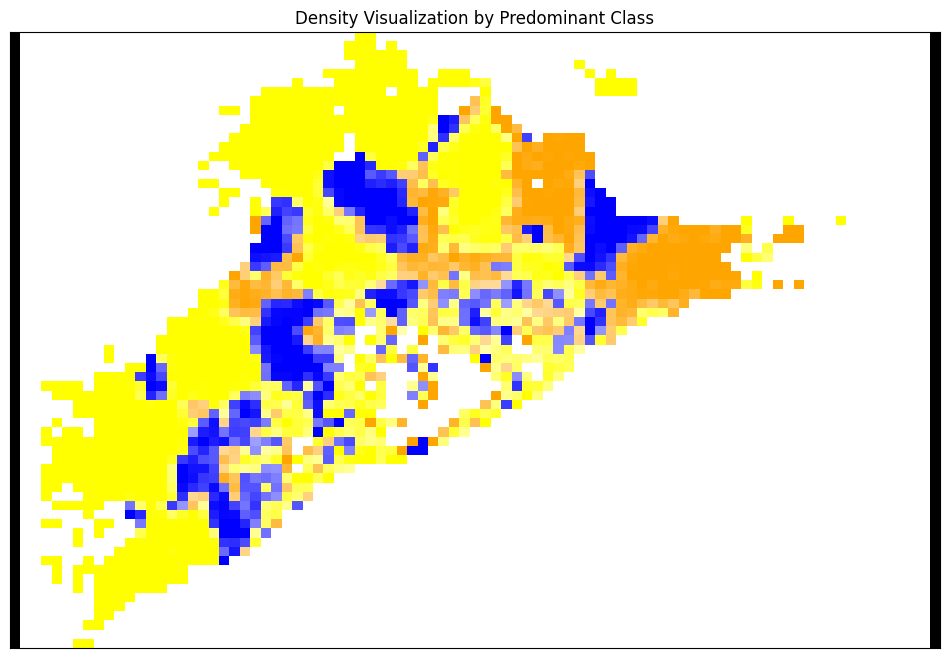

In [46]:
# Initialize arrays to store the predominant class and its corresponding density for each box
predominant_grid = np.full((grid.shape[0] // box_height, grid.shape[1] // box_width), np.nan)
alpha_grid = np.zeros_like(predominant_grid, dtype=float)

# Iterate over the grid in box-sized steps
for i in range(0, grid.shape[0], box_height):
    for j in range(0, grid.shape[1], box_width):
        sub_grid = grid[i:i+box_height, j:j+box_width]
        unique, counts = np.unique(sub_grid, return_counts=True, axis=None)
        
        # Filter out undeveloped land (0) and NaNs
        mask = (~np.isnan(unique)) & (unique != 0) & (unique != 4)
        unique, counts = unique[mask], counts[mask]
        
        if len(counts) > 0:
            max_idx = np.argmax(counts)
            predominant_class = unique[max_idx]
            total = np.sum(counts)
            density = counts[max_idx] / total

            # Store the predominant class and its density
            predominant_grid[i // box_height, j // box_width] = predominant_class
            alpha_grid[i // box_height, j // box_width] = density

# Define colors (excluding green for undeveloped lands)
colors = ['yellow', 'orange', 'blue', 'brown', 'black']  # 1, 2, 3, 4, NaN respectively
cmap = ListedColormap(colors)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 8))
for x in range(predominant_grid.shape[0]):
    for y in range(predominant_grid.shape[1]):
        cls = predominant_grid[x, y]
        if not np.isnan(cls):
            rect = patches.Rectangle((y, x), 1, 1, linewidth=0, edgecolor='none',
                                     facecolor=cmap(int(cls - 1)),
                                     alpha=alpha_grid[x, y])
            ax.add_patch(rect)

# Adding a color bar
cbar = fig.colorbar(cax, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['Undeveloped (0)', 'Low Income (1)', 'Middle Income (2)', 'High Income (3)', 'Commercial (4)', 'Not Constructable (NaN)'])
            
# Adjust the plot
ax.set_xlim(0, predominant_grid.shape[1])
ax.set_ylim(0, predominant_grid.shape[0])
ax.invert_yaxis()  # Invert the y-axis to match the array layout
ax.set_aspect('auto')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Density Visualization by Predominant Class')

img_name = file_name[:-4] + '_transparency_dominant_small_box.png'
img_path = root_path + img_name

plt.savefig(img_path)

plt.show()


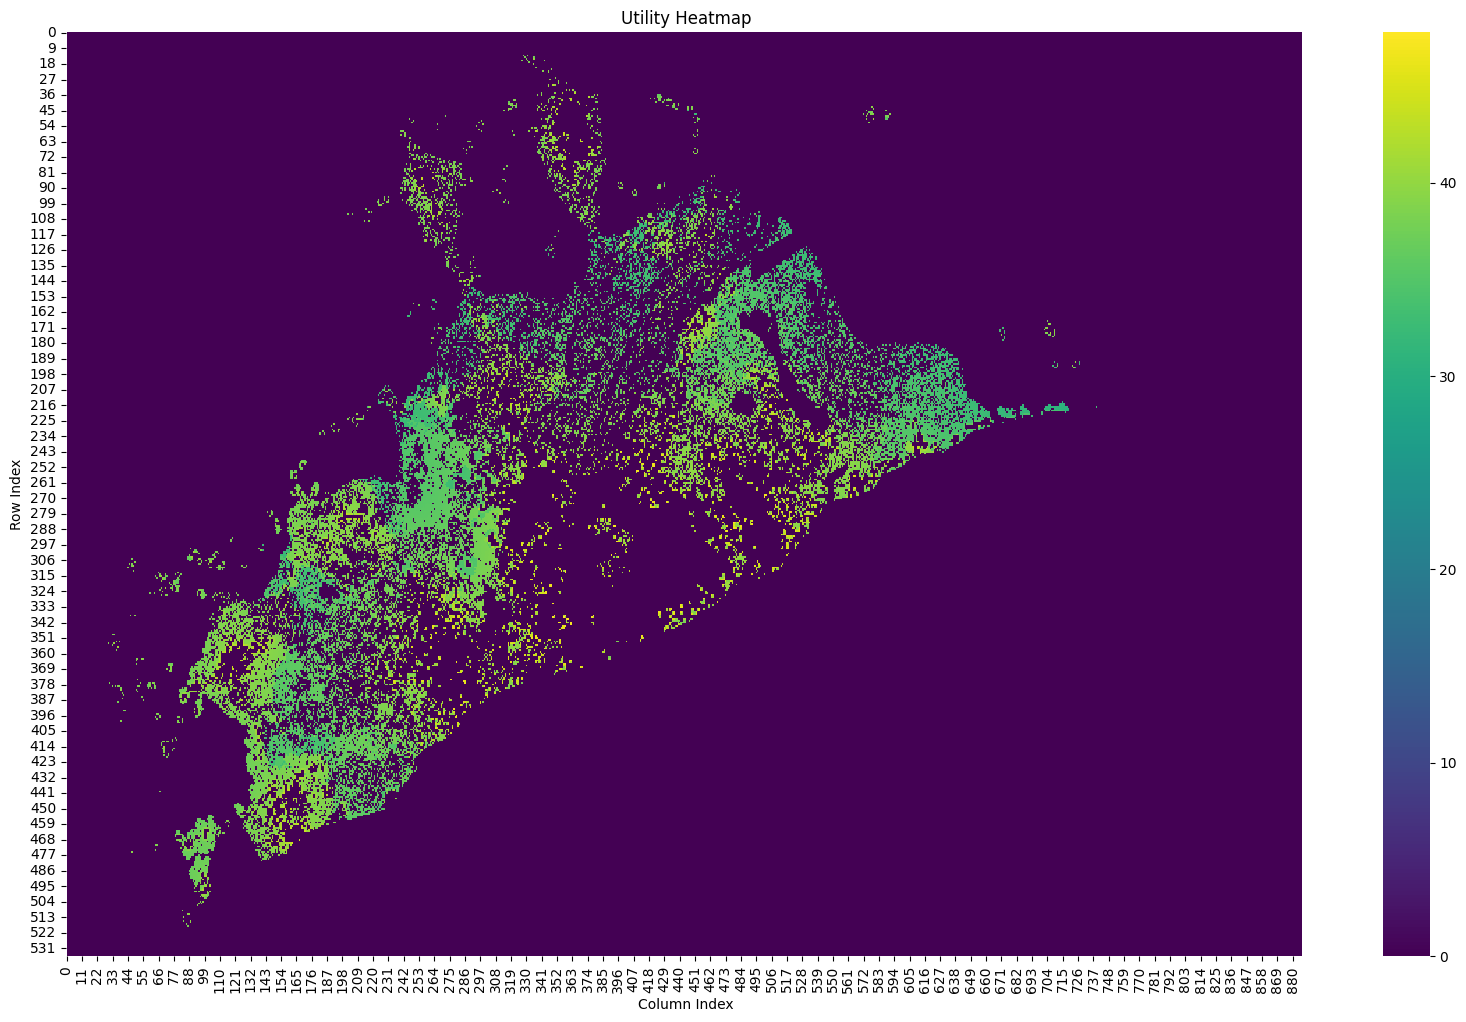

In [71]:
plt.figure(figsize=(20, 12))
sns.heatmap(ht, cmap='viridis', cbar=True)  # Seaborn handles NaNs gracefully if present
plt.title('Utility Heatmap')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()


In [72]:
num_rows = ht.shape[0] // box_height
num_cols = ht.shape[1] // box_width

# Aggregate utility data into boxes
utility_aggregated = ht.values.reshape(num_rows, box_height, num_cols, box_width).mean(axis=(1, 3))

In [73]:
df_density = pd.DataFrame(density_results)

In [75]:
df_density

,box_top_left,density_low_income,density_middle_income,density_high_income
0,"(0, 0)",0.0,0.0,0.0
1,"(0, 10)",0.0,0.0,0.0
2,"(0, 20)",0.0,0.0,0.0
3,"(0, 30)",0.0,0.0,0.0
4,"(0, 40)",0.0,0.0,0.0
...,...,...,...,...
5958,"(528, 840)",0.0,0.0,0.0
5959,"(528, 850)",0.0,0.0,0.0
5960,"(528, 860)",0.0,0.0,0.0
5961,"(528, 870)",0.0,0.0,0.0


In [76]:
# Calculate indices
df_density['row_index'] = df_density['box_top_left'].apply(lambda x: x[0] // box_height)
df_density['col_index'] = df_density['box_top_left'].apply(lambda x: x[1] // box_width)

# Drop the 'box_top_left' as it's no longer needed
df_density.drop('box_top_left', axis=1, inplace=True)

In [77]:
df_density

,density_low_income,density_middle_income,density_high_income,row_index,col_index
0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0,1
2,0.0,0.0,0.0,0,2
3,0.0,0.0,0.0,0,3
4,0.0,0.0,0.0,0,4
...,...,...,...,...,...
5958,0.0,0.0,0.0,66,84
5959,0.0,0.0,0.0,66,85
5960,0.0,0.0,0.0,66,86
5961,0.0,0.0,0.0,66,87


In [78]:
# Continuing from previous steps to aggregate utility
utility_aggregated = ht.values.reshape(num_rows, box_height, num_cols, box_width).mean(axis=(1, 3))

# Create a DataFrame
df_utility = pd.DataFrame(utility_aggregated.flatten(), columns=['Utility'])
df_utility['row_index'] = df_utility.index // num_cols
df_utility['col_index'] = df_utility.index % num_cols


In [79]:
df_merged = pd.merge(df_utility, df_density, on=['row_index', 'col_index'])


In [81]:
df_merged

,Utility,row_index,col_index,density_low_income,density_middle_income,density_high_income
0,NaN,0,0,0.0,0.0,0.0
1,0.0,0,1,0.0,0.0,0.0
2,0.0,0,2,0.0,0.0,0.0
3,0.0,0,3,0.0,0.0,0.0
4,0.0,0,4,0.0,0.0,0.0
...,...,...,...,...,...,...
5958,0.0,66,84,0.0,0.0,0.0
5959,0.0,66,85,0.0,0.0,0.0
5960,0.0,66,86,0.0,0.0,0.0
5961,0.0,66,87,0.0,0.0,0.0


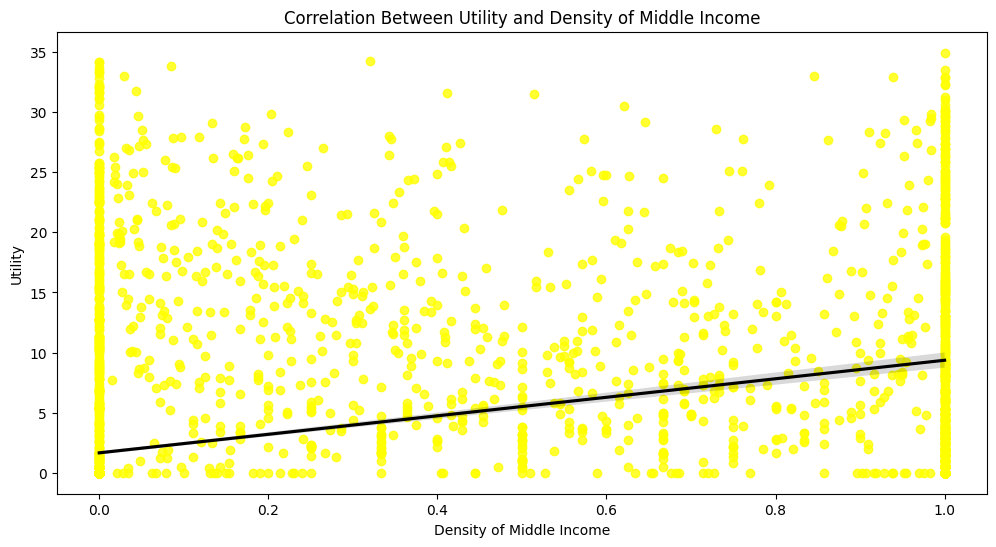

In [82]:
plt.figure(figsize=(12, 6))
sns.regplot(x='density_low_income', y='Utility', data=df_merged, marker='o', color='yellow', line_kws={'color':'black'})
plt.title('Correlation Between Utility and Density of Low Income')
plt.xlabel('Density of Middle Income')
plt.ylabel('Utility')
plt.show()


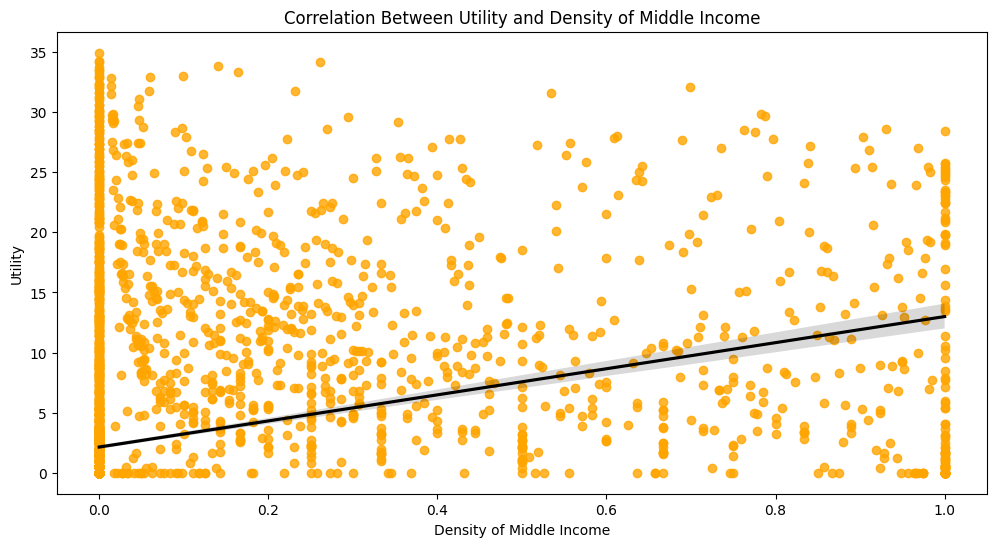

In [85]:
plt.figure(figsize=(12, 6))
sns.regplot(x='density_middle_income', y='Utility', data=df_merged, marker='o', color='orange', line_kws={'color':'black'})
plt.title('Correlation Between Utility and Density of Middle Income')
plt.xlabel('Density of Middle Income')
plt.ylabel('Utility')
plt.show()


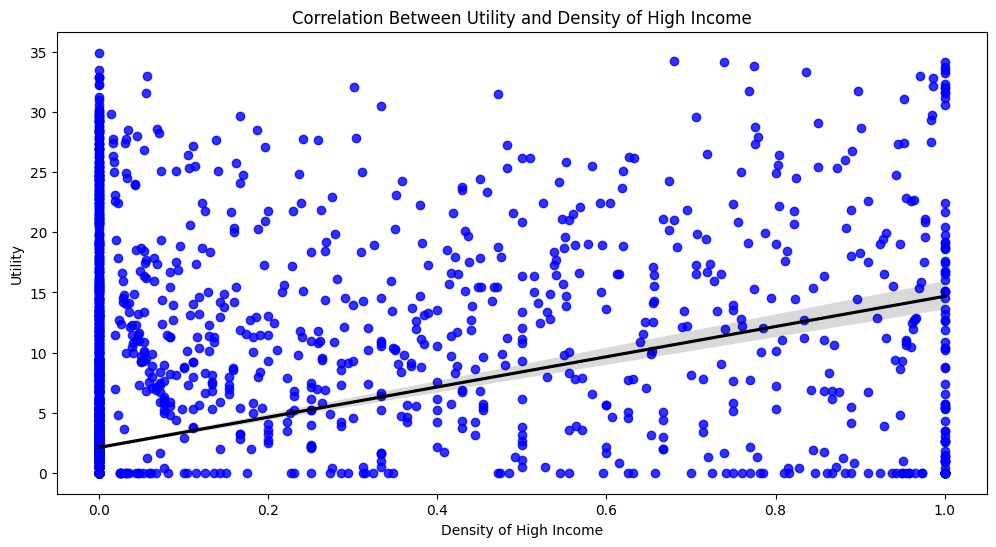

In [86]:
plt.figure(figsize=(12, 6))
sns.regplot(x='density_high_income', y='Utility', data=df_merged, marker='o', color='blue', line_kws={'color':'black'})
plt.title('Correlation Between Utility and Density of High Income')
plt.xlabel('Density of High Income')
plt.ylabel('Utility')
plt.show()